In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
X = pd.read_pickle("X.pkl")
y = pd.read_pickle("y.pkl")
az = pd.read_pickle("az.pkl")


In [3]:
target = y
predictors = X


In [13]:
len(X)
len(y)

3182

In [5]:
from sklearn import cross_validation, datasets
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [6]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        predictors, target, test_size=0.3)

In [16]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha=.1)
models['elasticnet'] = linear_model.ElasticNet()

In [17]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(X_test,y_test)))
    sorted_features = sorted(zip(predictors,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: lin_reg
Score: 0.0567931988991
('dum_PG', 1.7646793495241873)
('dum_PG-13', 1.5727971964150544)
('dum_R', 1.0638745024760741)
('dum_ Black and White', -0.16036539963891833)
('num_stars', 0.021833440763306473)
('duration', 0.0097998493205870198)
('title_year', 0.0028544751447240123)

Model: ridge
Score: 0.0568743419561
('dum_PG', 1.7303047418518203)
('dum_PG-13', 1.5416863045814726)
('dum_R', 1.0337012921019346)
('dum_ Black and White', -0.1582405826981626)
('num_stars', 0.022393951652100539)
('duration', 0.0098279261318138262)
('title_year', 0.0027735609818682855)

Model: lasso
Score: 0.00902731274907
('dum_PG-13', 0.031397938761155736)
('duration', 0.011970963128977446)
('title_year', 0.0)
('num_stars', 0.0)
('dum_ Black and White', -0.0)
('dum_PG', 0.0)
('dum_R', -0.0)

Model: elasticnet
Score: 0.00846356530384
('duration', 0.011246531432648506)
('title_year', 0.0)
('num_stars', 0.0)
('dum_ Black and White', -0.0)
('dum_PG', 0.0)
('dum_PG-13', 0.0)
('dum_R', -0.0)



In [18]:
shuffler = cross_validation.ShuffleSplit(len(X))


for name,model in models.items():
    score = cross_validation.cross_val_score(model, predictors, target, n_jobs=1, cv=shuffler)
    print('Model: ' + name)
    print(score)
    print("Score: " + str(np.mean(score)) + " with STD: " + str(np.std(score)))
    sorted_features = sorted(zip(predictors,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: lin_reg
[ 0.05188098  0.08516559  0.07493053  0.08758097  0.10770736  0.05404368
  0.00189756  0.04248018  0.11650901  0.03562946]
Score: 0.0657825307578 with STD: 0.0333616220906
('dum_PG', 1.7646793495241873)
('dum_PG-13', 1.5727971964150544)
('dum_R', 1.0638745024760741)
('dum_ Black and White', -0.16036539963891833)
('num_stars', 0.021833440763306473)
('duration', 0.0097998493205870198)
('title_year', 0.0028544751447240123)

Model: ridge
[ 0.02784893  0.06822372  0.07066169  0.0441227   0.10858741  0.10175851
  0.06830846  0.11073192  0.10307631  0.04520012]
Score: 0.0748519771788 with STD: 0.0284308665654
('dum_PG', 1.7303047418518203)
('dum_PG-13', 1.5416863045814726)
('dum_R', 1.0337012921019346)
('dum_ Black and White', -0.1582405826981626)
('num_stars', 0.022393951652100539)
('duration', 0.0098279261318138262)
('title_year', 0.0027735609818682855)

Model: lasso
[-0.0209522   0.01183059 -0.00423576 -0.0036573   0.01950246  0.00993794
  0.01339737  0.02227749  0.00366219 

In [21]:
from sklearn import cross_validation

import matplotlib.pyplot as plt
%matplotlib inline

def plot_overfit(X,y,model_obj,param_ranges,param_static=None): 
    for parameter,parameter_range in param_ranges.items():
        avg_train_score, avg_test_score = [],[]
        std_train_score, std_test_score = [],[]
        
        for param_val in parameter_range:
            param = {parameter:param_val}
            if param_static:
                param.update(param_static)
                
            model = model_obj(**param)
            
            train_scores,test_scores = [],[]
            for i in range(5):
                X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = .5)
                model.fit(X_train,y_train)
                
                train_scores.append(model.score(X_train,y_train))
                test_scores.append(model.score(X_test,y_test))
            
            avg_train_score.append(np.mean(train_scores))
            avg_test_score.append(np.mean(test_scores))
            
            std_train_score.append(np.std(train_scores))
            std_test_score.append(np.std(test_scores))
            
        fig,ax = plt.subplots()
        ax.errorbar(parameter_range,avg_train_score,yerr=std_train_score,label='training score')
        ax.errorbar(parameter_range,avg_test_score,yerr=std_test_score,label='testing score')
        
        ax.set_xlabel(parameter)
        ax.set_ylabel('score')
        ax.legend(loc=0)

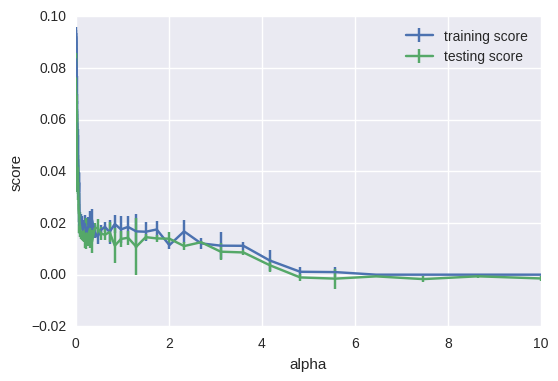

In [22]:
lasso = linear_model.Lasso
plot_overfit(predictors, target,lasso,{'alpha':np.logspace(-4,1,80)})

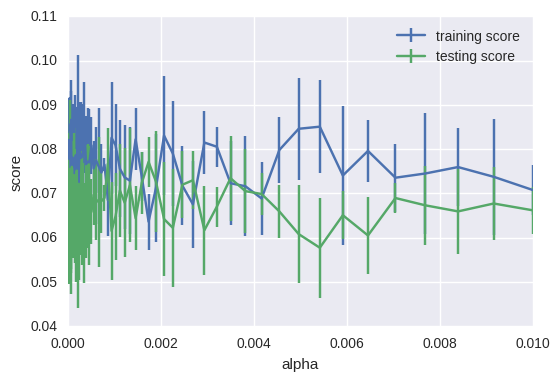

In [29]:
lasso = linear_model.Lasso
plot_overfit(predictors, target,lasso,{'alpha':np.logspace(-5,-2,80)})

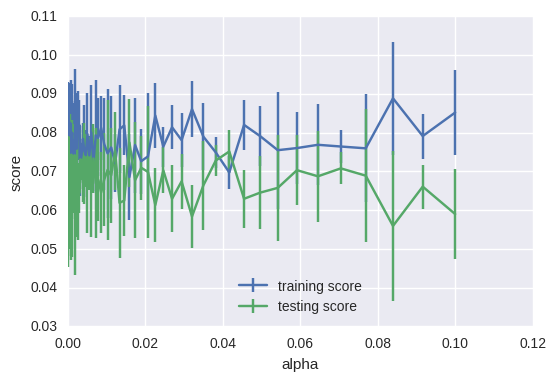

In [30]:
ridge = linear_model.Ridge
plot_overfit(predictors, target,ridge,{'alpha':np.logspace(-4,-1,80)})

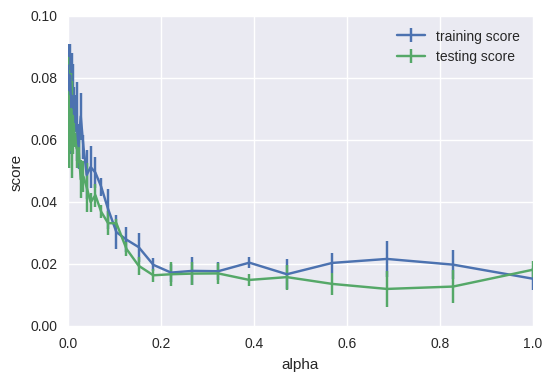

In [31]:
elastic = linear_model.ElasticNet
plot_overfit(predictors, target,elastic,{'alpha':np.logspace(-4,0,50)})

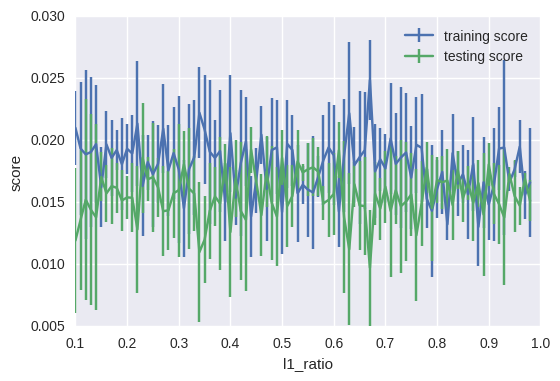

In [32]:
elastic = linear_model.ElasticNet
plot_overfit(predictors, target,elastic,{'l1_ratio':np.arange(0.1,0.99,.01)})

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
model = RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50, 
                              max_features = "auto", min_samples_leaf = 50)

In [37]:
model.fit(X_train,y_train)
predictedTest=model.predict(X_test)

In [38]:
predictedTest


array([ -1.32292870e-01,   6.42713319e-01,   4.90591048e-01,
        -3.66630812e-01,   2.83000788e-01,   2.04483507e-01,
         9.88129121e-01,   6.95908671e-01,   4.13385389e-01,
         6.13663973e-01,  -4.74918304e-01,   5.29058024e-01,
         8.36295850e-01,   2.44366096e-01,   1.02691128e-01,
         5.33670707e-02,  -2.01880172e-01,  -3.03945587e-01,
         4.46868879e-01,  -5.12515992e-01,   2.72374617e-01,
        -3.10773249e-01,   4.91928323e-01,   8.88863596e-01,
         4.24254742e-01,  -3.91129022e-01,  -1.77757912e-01,
         1.97732722e-01,  -5.84184377e-01,   2.70838746e-01,
         4.75653629e-01,   8.44658966e-01,   2.14178205e-01,
         6.24082455e-01,   7.85146123e-02,  -3.26225117e-01,
        -6.71370135e-01,   6.75606281e-01,   1.23570511e+00,
         8.28651991e-01,  -1.21106383e+00,   1.20180807e+00,
         1.20180807e+00,   1.13108649e+00,   1.82958848e-01,
        -2.82900226e-01,   8.41318155e-01,   5.57098741e-01,
        -1.97976209e-02,

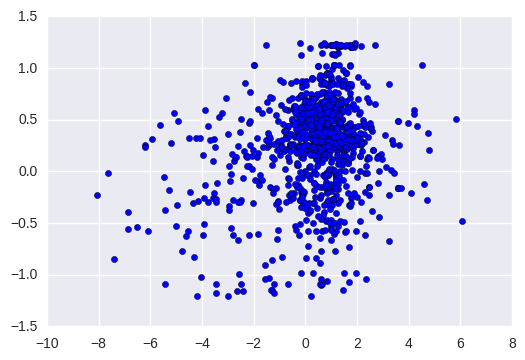

In [40]:
plt.scatter(y_test, predictedTest)